In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def clean_data():
    crimeData = pd.DataFrame(pd.read_csv(data_path))

    crimeData = crimeData.dropna(subset=['AREA', 'TIME.OCC', 'CrmCd.Desc'])
    crimeData['date2'] = pd.to_datetime((crimeData['DATE.OCC']))
    crimeData['Year'] = crimeData['date2'].dt.year
    crimeData['Month'] = crimeData['date2'].dt.month
    crimeData['Day'] = crimeData['date2'].dt.day

    time2 = []

    # convert TIME.OCC into readable time format
    time1 = list(crimeData['TIME.OCC'].astype(str))
    for t in range(len(time1)):
        if len(time1[t]) == 4:
            continue
        elif len(time1[t]) == 3:
            time1[t] = '0' + time1[t]
        elif len(time1[t]) == 2:
            time1[t] = '00' + time1[t]
        else:
            time1[t] = '000' + time1[t]

    crimeData['time2'] = time1
    crimeData['time2'] = pd.to_datetime(crimeData['time2'], format='%H%M')
    crimeData['Hour'] = crimeData['time2'].dt.hour
    crimeData['Minute'] = crimeData['time2'].dt.minute

    crimeData = crimeData.drop(['date2'], axis=1)
    crimeData = crimeData.drop(['time2'], axis=1)

    crimeData.head(5)

    daytime = []

    for hour in crimeData['Hour']:
        if hour < 3 or hour >= 21:
            daytime.append('Night')
        elif hour < 9:
            daytime.append('Morning')
        elif hour < 15:
            daytime.append('Midday')
        else:
            daytime.append('Evening')

    crimeData['Daytime'] = daytime
    crimeData['daytime_fact'] = pd.factorize(crimeData['Daytime'])[0]

    daytime_selector = [[] for i in range(4)]

    for row in crimeData['daytime_fact']:
        for i in range(4):
            if i == row:
                daytime_selector[i].append(True)
            else:
                daytime_selector[i].append(False)

    global daytime_selector_names
    daytime_selector_names = []

    for i in range(4):
        daytime_selector_names.append('daytime_selector_'+str(i))
        crimeData['daytime_selector_'+str(i)] = daytime_selector[i]

    season = []

    for month in crimeData['Month']:
        if month < 3 or month == 12:
            season.append('Winter')
        elif month < 6:
            season.append('Spring')
        elif month < 9:
            season.append('Summer')
        else:
            season.append('Fall')

    crimeData['Season'] = season
    crimeData['season_fact'] = pd.factorize(crimeData['Season'])[0]

    season_selector = [[] for i in range(4)]

    for row in crimeData['season_fact']:
        for i in range(4):
            if i == row:
                season_selector[i].append(True)
            else:
                season_selector[i].append(False)

    global season_selector_names
    season_selector_names = []

    for i in range(4):
        season_selector_names.append('season_selector_'+str(i))
        crimeData['season_selector_'+str(i)] = season_selector[i]


    category_numbers = [[510,480,520,487
                         ], [330,410
                             ], [310,320
                                 ], [440,442
                                     ], [420,331
                                         ], [210,220,341,668,343,350
                                             ], [624,860
                                                 ], [230,236
                                                     ], [626,930
                                                         ], [648,740,745,924
                                                             ], [354,649,651,652,660,662,664,666
                                                                 ], [438, 890, 997
                                                                     ], [121,122,805,810,815,820,821,830,840,850,932,933,753,756,761,931,439,900,901,902,903
                                                                         ], []]

    category_names = ['Vehicle Theft','Burglary from Vehicle','Burglary','Petty Theft','Theft From Vehicle','Robbery and Grand Theft',
                        'Battery','Aggravated Assault','Spousal Abuse and Threats','Criminal Damage and Kindred Offences',
                        'Forgery, Personation and Cheating','Motor Vehicle Offences','Sex crimes, firearms and public justice','Other']

    new_categories = []
    for number in crimeData['Crm.Cd']:
        for i in range(14):
            if i == 13:
                new_categories.append(category_names[i])
                break
            if number in category_numbers[i]:
                new_categories.append(category_names[i])
                break


    crimeData['Categories'] = new_categories
    crimeData['cat_fact'] = pd.factorize(crimeData["Categories"])[0]

    area_selector = [[] for i in range(21)]

    for row in crimeData['AREA']:
        for i in range(1,22):
            if i == row:
                area_selector[i-1].append(True)
            else:
                area_selector[i-1].append(False)

    global area_selector_names
    area_selector_names = []

    for i in range(1,22):
        area_selector_names.append('area_selector_'+str(i))
        crimeData['area_selector_'+str(i)] = area_selector[i-1]

    print("Total number of crimes in the dataset: {}".format(len(crimeData)))

    return crimeData

In [ ]:
data_path = "Data/Crimes_2012-2016.csv"
data_c = clean_data()
data_c = data_c.iloc[:,:-21]

### Überblick über alle Daten

In [4]:
crimeData = pd.read_csv("Data/Crimes_2012-2016.csv")
print("Total number of crimes in the dataset: {}".format(len(crimeData)))
crimeData.head()

Total number of crimes in the dataset: 1136589


,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


### Duplikaten und fehlende Werte

In [5]:
# Duplikaten (noch klären!)

print("Anzahl Duplikaten in der Spalte 'DR.NO': ",crimeData.duplicated(subset=['DR.NO'], keep ='first').sum())
print(crimeData.duplicated(keep='first').sum())
print("Anzahl Duplikaten in der Spalte 'Crm.Cd': ",crimeData.duplicated(subset=['Crm.Cd'], keep ='first').sum())
print("Anzahl Duplikaten in der Spalte 'TIME.OCC': ",crimeData.duplicated(subset=['TIME.OCC'], keep ='first').sum())

# sichere Prüfung mit for-Loop
#dupl = crimeData.duplicated(keep = 'first')#subset=['DR.NO'], keep ='first')
#summe = 0
#for i in range(len(dupl)):
#    if dupl.iloc[i]== True:
#        print(i, dupl.iloc[i], crimeData.iloc[i,:3])
#        summe +=1

Anzahl Duplikaten in der Spalte 'DR.NO':  1033
1000
Anzahl Duplikaten in der Spalte 'Crm.Cd':  1136449
Anzahl Duplikaten in der Spalte 'TIME.OCC':  1135150


In [6]:
# Dazu ein Beispiel:
# zwei Instanzen, 273963 und 12380, mit gleicher DR.NO (DR.NO=131408402)
for i in range(len(dupl)):
    if crimeData.iloc[i,1]== 131408402:
        print(i)
print(crimeData.iloc[12380,:],crimeData.iloc[273963,:])

NameError: name 'dupl' is not defined

In [7]:
# Checking for null values
N_null = sum(crimeData.isnull().sum())
print("The raw_dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(crimeData.duplicated(keep='first'))
#dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The raw_dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = crimeData.shape[0]

The raw_dataset contains 821129 null values
The raw_dataset contains 1000 duplicates


In [8]:
# Daten auf fehlende Werte (NULL-Werte) prüfen
crimeData.isnull().sum()

Date.Rptd            0
DR.NO                0
DATE.OCC             0
TIME.OCC             0
AREA                 0
AREA.NAME            0
RD                   0
Crm.Cd               0
CrmCd.Desc         158
Status               0
Status.Desc          0
LOCATION             0
Cross.Street    816574
Location.1        4397
dtype: int64

### Grundlegende Statistik

In [9]:
# Die Daten grundlegend beschreiben
# nur bei sechs Attributen ist es sinvoll statistische Methode anzuwenden, bei allen anderen 
# ist es wegen ihres Datentypes (String/kategorisch) unmöglich
# 
crimeData.describe()

,DR.NO,TIME.OCC,AREA,RD,Crm.Cd
count,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06
mean,1.405451e+08,1.367056e+03,1.109752e+01,1.156037e+03,5.798710e+02
std,1.389175e+07,6.374626e+02,5.982122e+00,5.983798e+02,2.593059e+02
min,4.180000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02
25%,1.306055e+08,9.300000e+02,6.000000e+00,6.450000e+02,3.410000e+02
50%,1.410093e+08,1.430000e+03,1.100000e+01,1.181000e+03,5.100000e+02
75%,1.514123e+08,1.900000e+03,1.600000e+01,1.664000e+03,7.450000e+02
max,1.699148e+08,2.359000e+03,2.100000e+01,2.198000e+03,9.970000e+02


In [10]:
# Um die Statistik auch für kategorische Variable anzuzeigen, wird folgende Funktion verwendet
# Hier können wir schon ableiten, dass zB. für das Attribut AREA.NAME folgendes gilt:
# unique - Es gibt 21 Name des Gebietes 
# top - der häufigste im Datensatz ist "77th Street"
# freq - "77th Street" kommt 77928 mal im Datensatz vor

crimeData.describe(include = 'all')

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
count,1136589,1.136589e+06,1136589,1.136589e+06,1.136589e+06,1136589,1.136589e+06,1.136589e+06,1136431,1136589,1136589,1136589,320015,1132192
unique,1773,NaN,1770,NaN,NaN,21,NaN,NaN,161,9,7,206290,18761,68553
top,12/31/2013,NaN,01/01/2012,NaN,NaN,77th Street,NaN,NaN,TRAFFIC DR #,IC,Invest Cont,WESTERN AV,BROADWAY,"(0.0, 0.0)"
freq,1082,NaN,1604,NaN,NaN,77928,NaN,NaN,167051,916146,916146,1709,3181,6771
mean,NaN,1.405451e+08,NaN,1.367056e+03,1.109752e+01,NaN,1.156037e+03,5.798710e+02,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.389175e+07,NaN,6.374626e+02,5.982122e+00,NaN,5.983798e+02,2.593059e+02,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.180000e+02,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+02,1.100000e+02,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.306055e+08,NaN,9.300000e+02,6.000000e+00,NaN,6.450000e+02,3.410000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.410093e+08,NaN,1.430000e+03,1.100000e+01,NaN,1.181000e+03,5.100000e+02,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.514123e+08,NaN,1.900000e+03,1.600000e+01,NaN,1.664000e+03,7.450000e+02,NaN,NaN,NaN,NaN,NaN,NaN


### Häufigkeiten

In [11]:
print("Top 10 Verbrechentypen und deren Anzahl:")
print(crimeData["CrmCd.Desc"].value_counts().head(10))
#crimeData["CrmCd.Desc"].value_counts(dropna = False).head(10) # mit fehlenden Werten zusammen

Top 10 Verbrechentypen und deren Anzahl:
TRAFFIC DR #                                               167051
BATTERY - SIMPLE ASSAULT                                    90224
VEHICLE - STOLEN                                            73346
BURGLARY FROM VEHICLE                                       72511
BURGLARY                                                    69410
THEFT PLAIN - PETTY ($950 & UNDER)                          58956
THEFT OF IDENTITY                                           57637
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT                       54751
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              41887
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     40756
Name: CrmCd.Desc, dtype: int64


Top 10 Verbrechentypen und deren relativen Häufigkeiten:
TRAFFIC DR #                                               0.146996
BATTERY - SIMPLE ASSAULT                                   0.079392
VEHICLE - STOLEN                                           0.064541
BURGLARY FROM VEHICLE                                      0.063806
BURGLARY                                                   0.061077
THEFT PLAIN - PETTY ($950 & UNDER)                         0.051878
THEFT OF IDENTITY                                          0.050718
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT                      0.048178
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             0.036858
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    0.035863
Name: CrmCd.Desc, dtype: float64


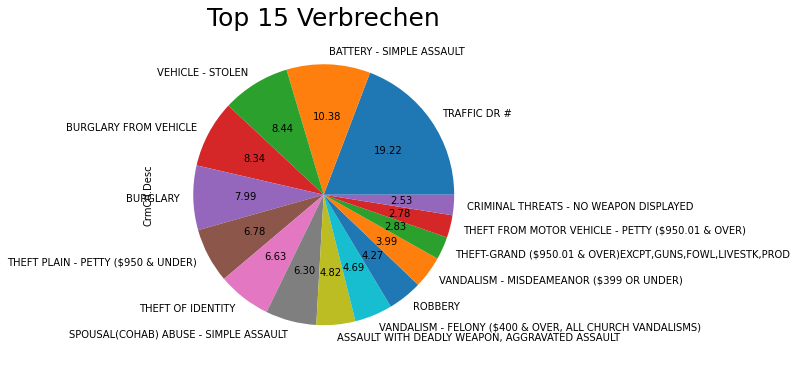

In [12]:
print("Top 10 Verbrechentypen und deren relativen Häufigkeiten:")
print(crimeData["CrmCd.Desc"].value_counts(normalize=True).head(10))
crimeData["CrmCd.Desc"].value_counts().head(15).plot(kind = 'pie',autopct='%.2f',figsize=(6,6))
_=plt.title('Top 15 Verbrechen', fontsize=25)

In [344]:
# Sortieren nach einem bestimmten Attribut, zB. Crimetypen
#crimeData.sort_values("CrmCd.Desc")

## Visualisieren

### 1. Heatmap

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# data transformation
data = crimeData.loc[:,["Date.Rptd","AREA","CrmCd.Desc"]] #take only three columns: how crimetype dependence on area and year
data["Date.Rptd"] = pd.to_numeric(crimeData['Date.Rptd'].str[-4:]) #convert date to single year and make it int
data = data.rename(columns={"Date.Rptd": "Year", "AREA": "Area", "CrmCd.Desc": "Crime"}) #rename columns for easy understanding
# count crimes per area and year
data1 = data.groupby(['Area', 'Year']).count().reset_index()
# next step is needed for heatmap function
data2 = data1.pivot("Year","Area","Crime")
#data2.head()

In [1]:
print("Zwei gefährlichte Gebiete in LA sind 3 und 12","\nIm Jahr 2014 gab es am meisten Verbrechen")
fig, ax = plt.subplots(figsize=(18,8)) 
sns.heatmap(data2,annot=True, fmt="d",linewidths=.5 ,cmap="YlGnBu") #,annot=True, fmt="d"
plt.show()

Zwei gefährlichte Gebiete in LA sind 3 und 12 
Im Jahr 2014 gab es am meisten Verbrechen


NameError: name 'plt' is not defined

In [17]:
#Prüfen, ob Monat eine Rolle für dir Prognose spielt
# data transformation
data_mon = crimeData.loc[:,["Date.Rptd","CrmCd.Desc"]] #take only three columns: how crimetype dependence on area and year
data_mon['Month'] = pd.to_numeric(crimeData['Date.Rptd'].str[:2]) #convert date to single month and make it int
data_mon['Date.Rptd'] = pd.to_numeric(crimeData['Date.Rptd'].str[-4:]) #convert date to single year and make it int
data_mon = data_mon.rename(columns={"Date.Rptd": "Year", "CrmCd.Desc": "Crime"}) #rename columns for easy understanding
# count crimes per area and year
data_mon1 = data_mon.groupby(['Month', 'Year']).count().reset_index()
# next step is needed for heatmap function
data_mon2 = data_mon1.pivot("Year","Month","Crime")

Keine systematische Abhängigkeit von Monat


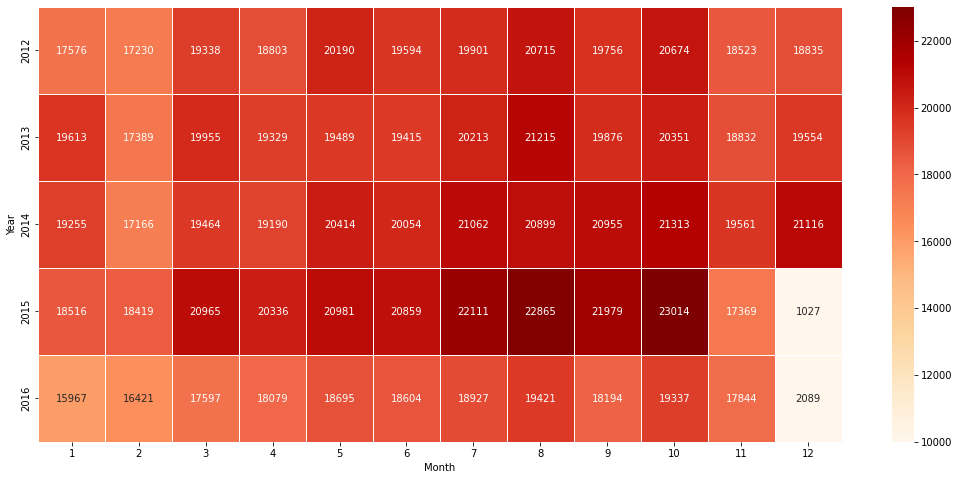

In [18]:
print("Keine systematische Abhängigkeit von Monat")
fig, ax = plt.subplots(figsize=(18,8)) 
sns.heatmap(data_mon2,annot=True, fmt="d",linewidths=.5 ,cmap="OrRd", vmin = 10000) #,annot=True, fmt="d"
plt.show()

In [266]:
# Prüfen die Zeit 

In [19]:
data_time = pd.DataFrame()
data_time['Crime'] = crimeData['Crm.Cd'] # CrmCd.Desc
data_time['Stunde'] = pd.to_numeric(crimeData['TIME.OCC'].astype(str).str[:-2])
data_timen = data_time.to_numpy()
#data_timen2 = data_time[data_time.iloc[:,0]== 330].to_numpy()

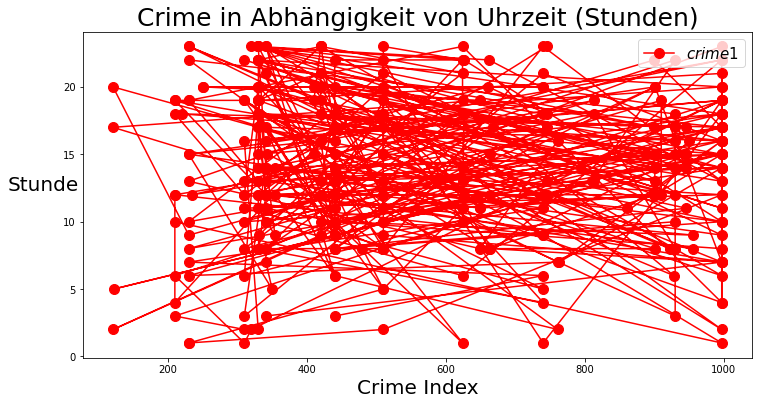

In [20]:
x = data_timen[:350,0]
y = data_timen[:350,1]
#x2 = data_timen2[:350,0]
#y2 = data_timen2[:350,1]
plt.figure(figsize=(12,6))

# connected circles marker style
plt.plot(x, y, 'o-', color='red', label='$crime1$', ms=10)
#plt.plot(x2, y2, '*--', color='green', label='$ctime2$', ms=10)
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('Crime Index', fontsize=20) # x-axis label + fontsize
plt.ylabel('Stunde', fontsize=20, rotation=0, labelpad=20) # y-axis label + rotation angle (default 90 degree)

_=plt.title('Crime in Abhängigkeit von Uhrzeit (Stunden)', fontsize=25)
#print(x)

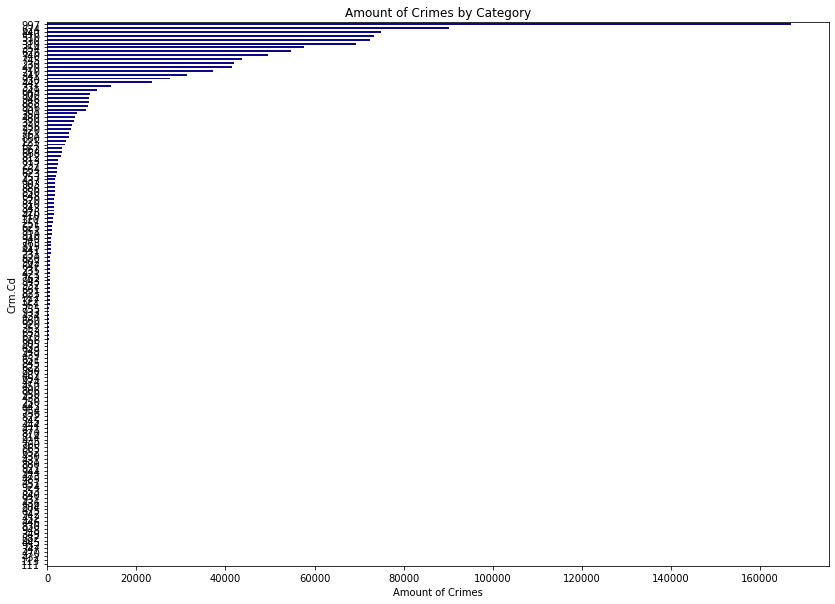

In [21]:
#Ändern, wenn Kategorien gibt
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Category')
plt.ylabel('Crime Category')
plt.xlabel('Amount of Crimes')

crimeData.groupby([crimeData['Crm.Cd']]).size().sort_values(ascending=True).plot(kind='barh',cmap="plasma")

plt.show()

### Crime pro Jahr

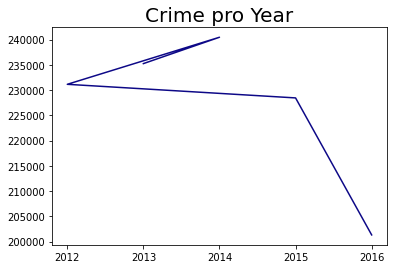

In [22]:
p = data['Year'].unique()
data['Year'].value_counts(sort=False).plot(kind = 'line',xticks = p, cmap = 'plasma')
_=plt.title('Crime pro Year', fontsize=20)

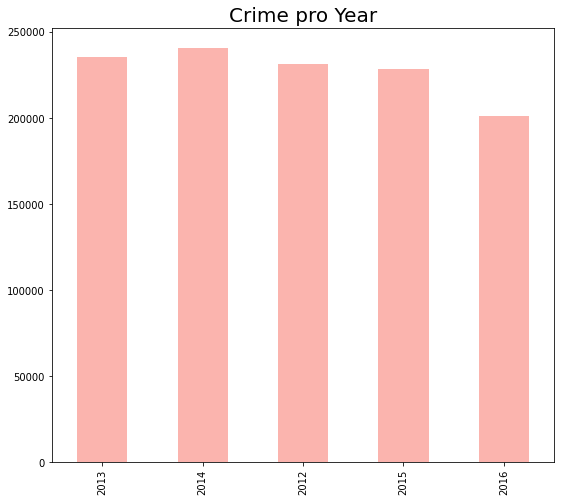

In [23]:
data['Year'].value_counts(sort=False).plot(kind="bar",figsize=(9,8), cmap = 'Pastel1')
_=plt.title('Crime pro Year', fontsize=20)

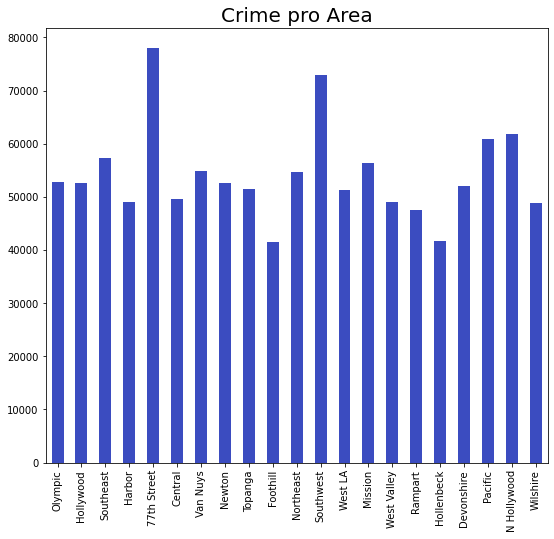

In [24]:
crimeData['AREA.NAME'].value_counts(sort=False).plot(kind="bar",figsize=(9,8), cmap = 'coolwarm')
_=plt.title('Crime pro Area', fontsize=20)

## Von anderem Notebook

In [25]:
crimeData.groupby('CrmCd.Desc').count()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,Status,Status.Desc,LOCATION,Cross.Street,Location.1
CrmCd.Desc,,,,,,,,,,,,,
ABORTION/ILLEGAL,4,4,4,4,4,4,4,4,4,4,4,1,4
ARSON,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,121,1605
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,730,730,730,730,730,730,730,730,730,730,730,326,729
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",41887,41887,41887,41887,41887,41887,41887,41887,41887,41887,41887,15804,41731
ATTEMPTED ROBBERY,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,2853,5275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE - STOLEN,73346,73346,73346,73346,73346,73346,73346,73346,73346,73346,73346,17971,73127
VIOLATION OF COURT ORDER,9472,9472,9472,9472,9472,9472,9472,9472,9472,9472,9472,1270,9440
VIOLATION OF RESTRAINING ORDER,8782,8782,8782,8782,8782,8782,8782,8782,8782,8782,8782,653,8758


In [5]:
crimeByType = crimeData['CrmCd.Desc'].value_counts()
crimeByType.head(20)

TRAFFIC DR #                                                167051
BATTERY - SIMPLE ASSAULT                                     90224
VEHICLE - STOLEN                                             73346
BURGLARY FROM VEHICLE                                        72511
BURGLARY                                                     69410
THEFT PLAIN - PETTY ($950 & UNDER)                           58956
THEFT OF IDENTITY                                            57637
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT                        54751
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               41887
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      40756
ROBBERY                                                      37147
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     34637
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     24631
THEFT FROM MOTOR VEHICLE - PETTY ($950.01 & OVER)            24141
CRIMINAL THREATS - NO WEAPON DISPLAYED                       2

<AxesSubplot:>

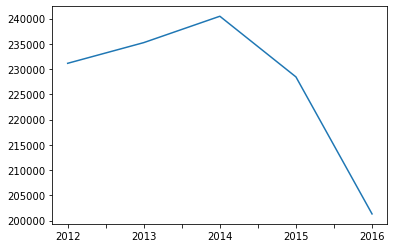

In [287]:
crimeData['year'] = pd.Series(crimeData['Date.Rptd'].str[-4:],index=crimeData.index)
crimeByYear = crimeData['year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'line')

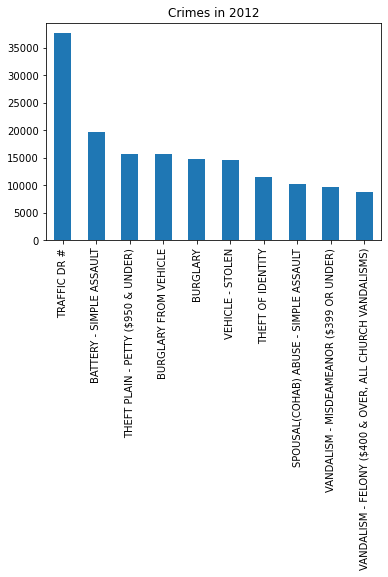

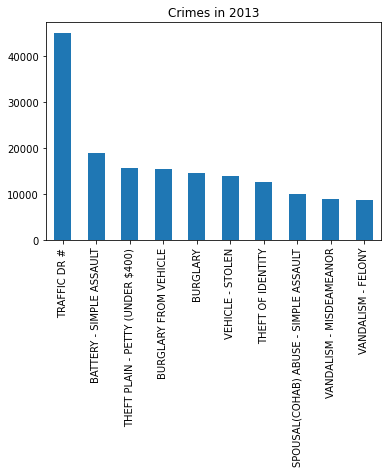

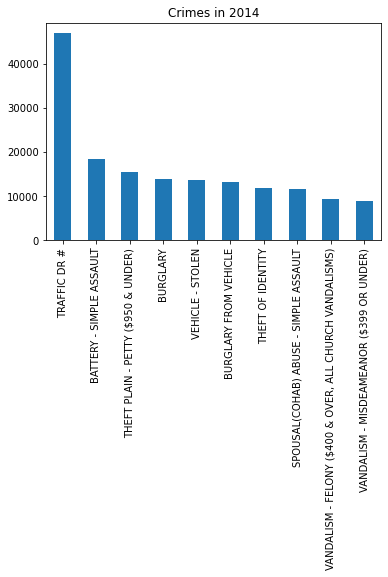

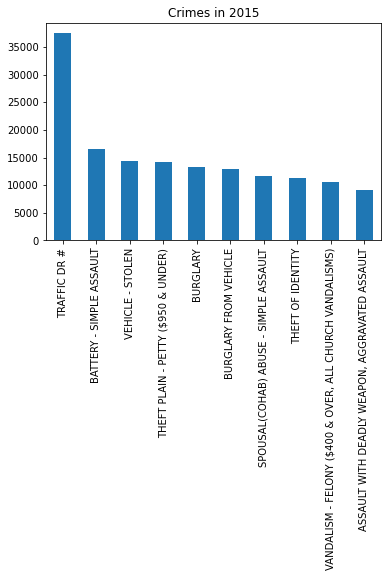

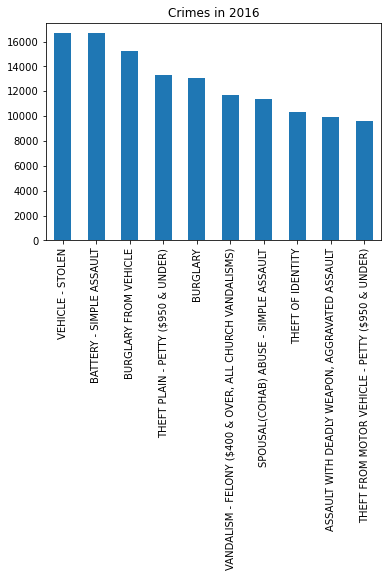

In [6]:
for year in crimeByYear.keys():
    crimeYear = crimeData[crimeData['year'] == year]['CrmCd.Desc'].value_counts()[:10]
    crimeYear = crimeYear.plot(kind = 'bar',title = "Crimes in " + year)
    plt.show()

### Listing Crime Areas

In [8]:
crimeData['AREA.NAME'].value_counts()

77th Street    77928
Southwest      72937
N Hollywood    61851
Pacific        60798
Southeast      57369
Mission        56274
Van Nuys       54895
Northeast      54711
Olympic        52796
Newton         52626
Hollywood      52524
Devonshire     52012
Topanga        51534
West LA        51276
Central        49561
West Valley    49070
Harbor         48960
Wilshire       48746
Rampart        47595
Hollenbeck     41717
Foothill       41409
Name: AREA.NAME, dtype: int64

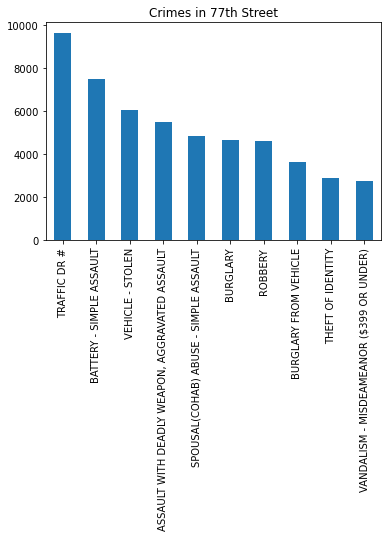

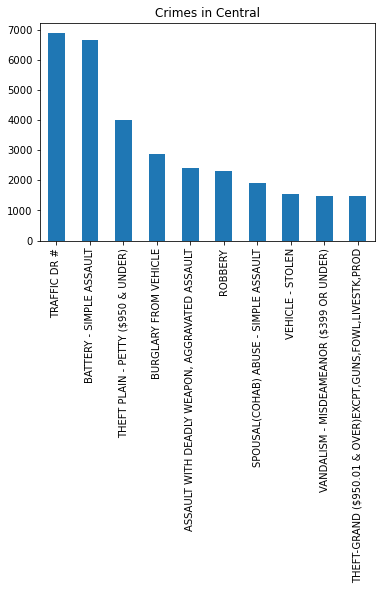

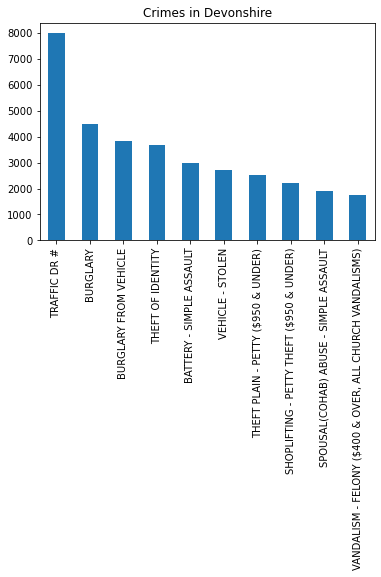

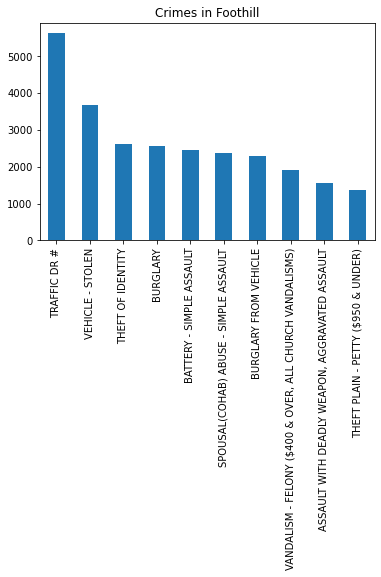

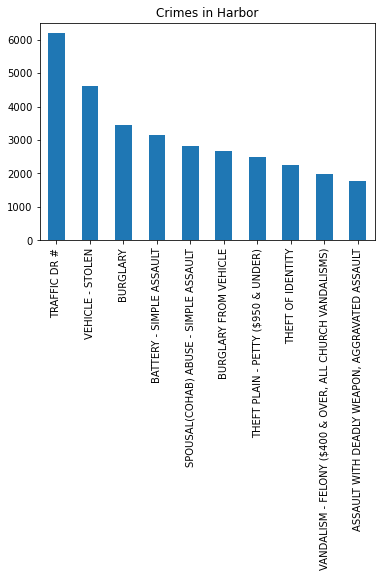

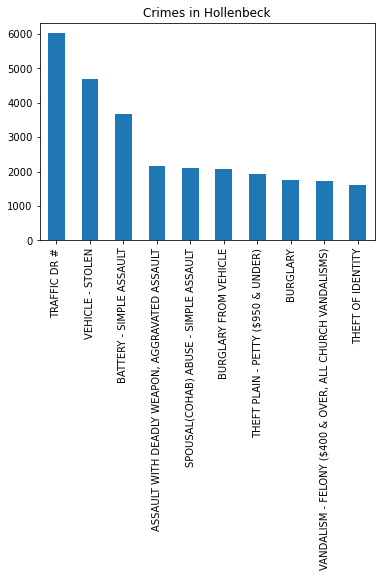

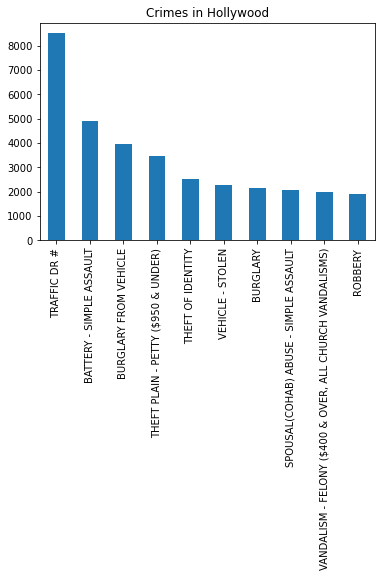

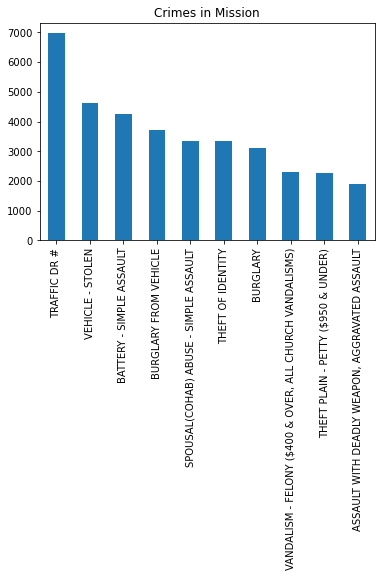

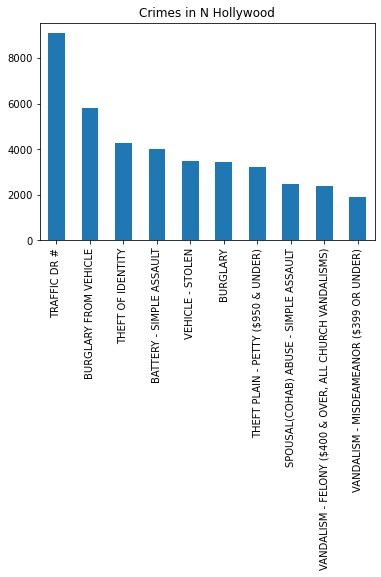

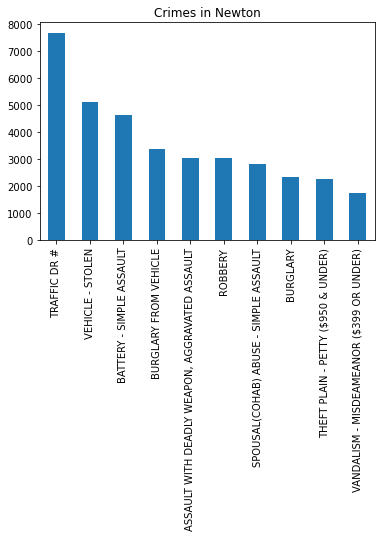

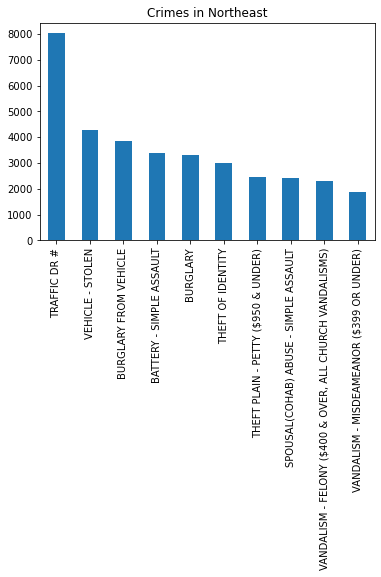

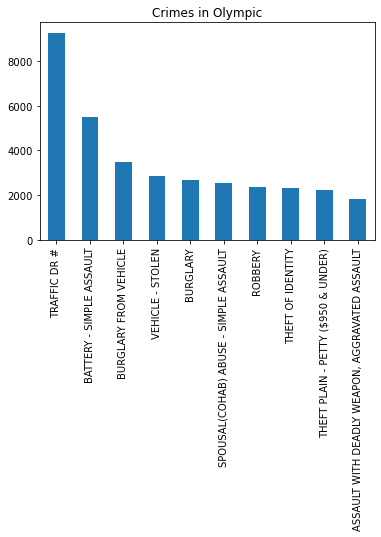

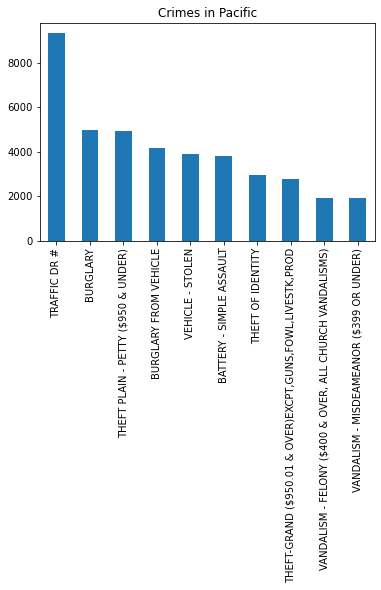

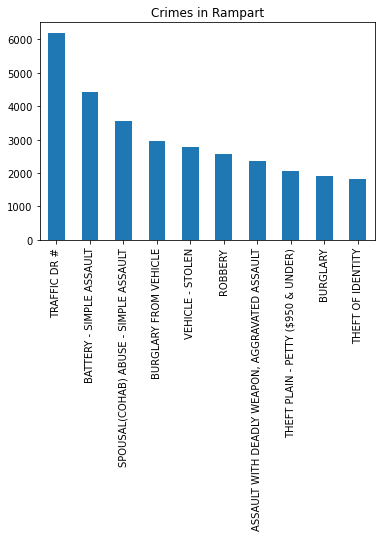

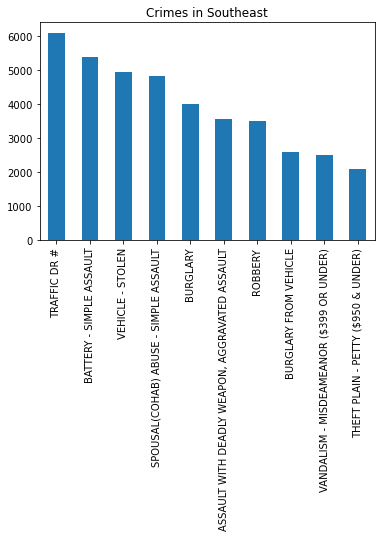

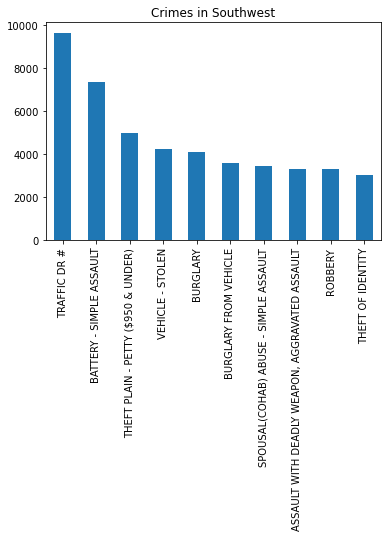

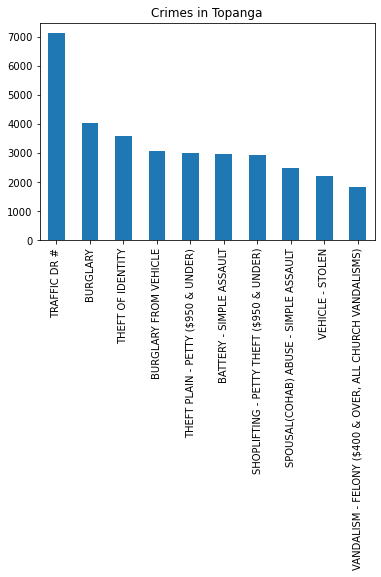

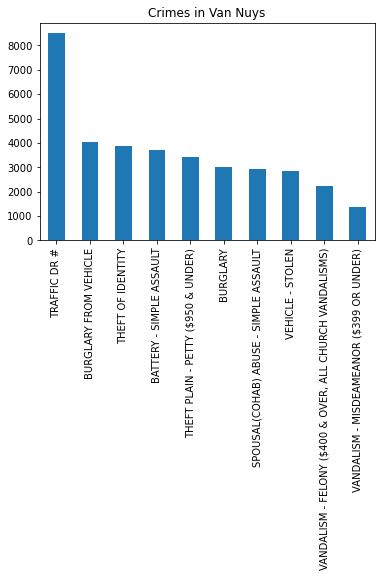

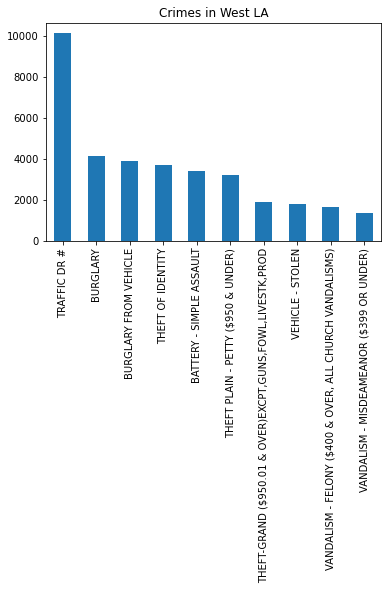

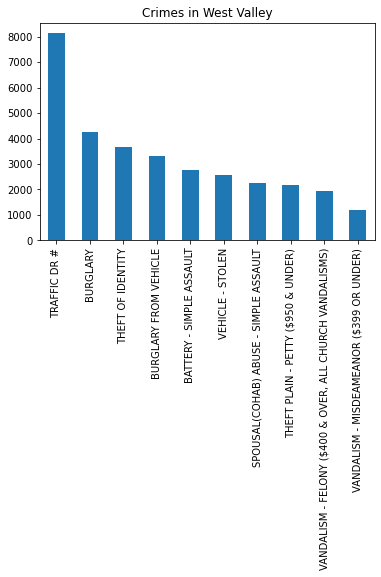

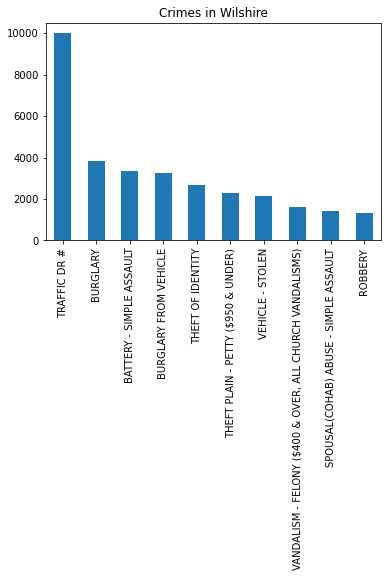

In [11]:
#the most common crime areas
crimeByArea = crimeData['AREA.NAME'].value_counts().sort_index()
crimeCommonType = {} # This dictionary is for later
for area in crimeByArea.keys():
    crimeArea = crimeData[crimeData['AREA.NAME'] == area]['CrmCd.Desc'].value_counts()[:10]
    for crType in crimeArea.keys():
        if not crType in crimeCommonType:
            crimeCommonType[crType] = [area]
        else:
            crimeCommonType[crType].append(area)
    crimeArea = crimeArea.plot(kind = 'bar',title = "Crimes in " + area)
    plt.show()

## Correlation Matrix

In [345]:
from pysurvival.utils.display import correlation_matrix
import seaborn as sns
X       = pd.read_csv('/Users/svpovol/Desktop/SoSe22/BIS/Projekt/Daten/Crimes.csv')

In [352]:
#convert TIME.OCC into readable time format
time1 = list(X['TIME.OCC'].astype(str))
for t in range(len(time1)):
    if len(time1[t]) == 4:
        continue
    elif len(time1[t]) == 3:
        time1[t] = '0' + time1[t]
    elif len(time1[t]) == 2:
        time1[t] = '00' + time1[t]
    else:
        time1[t] = '000' + time1[t]

#crimeData['Minute'] = crimeData['time2'].dt.minute
#crimeData = crimeData.drop(['date2'], axis= 1)
#crimeData = crimeData.drop(['time2'], axis= 1)

In [392]:
# Auswahl relevanter Attributen
columns_names = X.columns.values.tolist()
#TIME.OCC, DR.NO, AREA.NAME,Crm.Cd,Status, 'Location.1'
data = X[['Date.Rptd',
 'Crm.Cd',
 'AREA',
 'Status',
 'LOCATION',
 'Cross.Street'
]]
data['time2'] = pd.to_datetime(time1,format='%H%M')
data['Hour'] = data['time2'].dt.hour

## Splitting the Date to Day, Month, Year, Hour, Minute, Second
data['date2'] = pd.to_datetime(data['Date.Rptd'])
data['Year'] = data['date2'].dt.year
data['Month'] = data['date2'].dt.month

data = data.drop(['time2', 'Date.Rptd','date2'], axis= 1)
data
#data['Date.Rptd'].isnull().sum()
#print(data.corr(method='pearson', min_periods=1))

<ipython-input-392-bf3755b4e528>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time2'] = pd.to_datetime(time1,format='%H%M')
<ipython-input-392-bf3755b4e528>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['time2'].dt.hour
<ipython-input-392-bf3755b4e528>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Crm.Cd,AREA,Status,LOCATION,Cross.Street,Hour,Year,Month
0,997,20,UNK,OXFORD,OAKWOOD,20,2013,3
1,997,6,UNK,ODIN ST,CAHUENGA BL,4,2013,3
2,997,18,UNK,105TH ST,CROESUS AV,7,2013,12
3,997,18,UNK,101ST ST,JUNIPER ST,17,2013,10
4,440,5,UNK,1300 W SEPULVEDA BL,NaN,20,2013,5
...,...,...,...,...,...,...,...,...
1136584,740,20,IC,1155 ELDEN AV,NaN,22,2016,5
1136585,946,3,IC,3745 S VICTORIA AV,NaN,10,2016,6
1136586,626,12,IC,943 W 75TH ST,NaN,20,2016,5
1136587,440,10,IC,7545 BALBOA BL,NaN,8,2016,9


In [393]:
# Konvertieren Attribute, sodass sie numerisch werden 
data['Status'] = pd.factorize(data["Status"])[0]
data['LOCATION'] = pd.factorize(data["LOCATION"])[0]
data['Cross.Street'] = pd.factorize(data["Cross.Street"])[0]

In [394]:
data.describe()
#np.info(crimeData['LOCATION'].unique())

,Crm.Cd,AREA,Status,LOCATION,Cross.Street,Hour,Year,Month
count,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06,1.136589e+06
mean,5.798710e+02,1.109752e+01,1.305313e+00,5.373108e+04,8.607282e+02,1.349953e+01,2.013942e+03,6.427274e+00
std,2.593059e+02,5.982122e+00,6.799603e-01,4.917477e+04,2.866250e+03,6.372295e+00,1.387991e+00,3.312849e+00
min,1.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00
25%,3.410000e+02,6.000000e+00,1.000000e+00,1.066300e+04,-1.000000e+00,9.000000e+00,2.013000e+03,4.000000e+00
50%,5.100000e+02,1.100000e+01,1.000000e+00,4.626000e+04,-1.000000e+00,1.400000e+01,2.014000e+03,6.000000e+00
75%,7.450000e+02,1.600000e+01,1.000000e+00,7.267000e+04,1.040000e+02,1.900000e+01,2.015000e+03,9.000000e+00
max,9.970000e+02,2.100000e+01,8.000000e+00,2.062890e+05,1.876000e+04,2.300000e+01,2.016000e+03,1.200000e+01


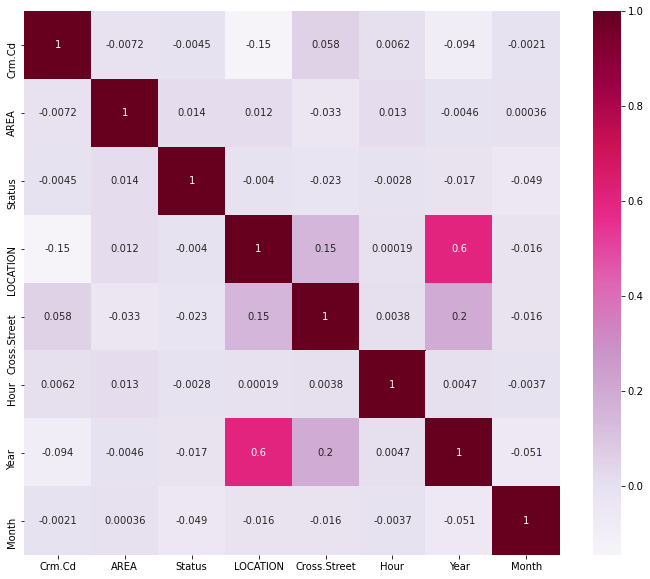

                Crm.Cd      AREA    Status  LOCATION  Cross.Street      Hour  \
Crm.Cd        1.000000 -0.007151 -0.004477 -0.145183      0.058110  0.006206   
AREA         -0.007151  1.000000  0.014258  0.012197     -0.033378  0.013211   
Status       -0.004477  0.014258  1.000000 -0.004004     -0.022738 -0.002812   
LOCATION     -0.145183  0.012197 -0.004004  1.000000      0.152832  0.000188   
Cross.Street  0.058110 -0.033378 -0.022738  0.152832      1.000000  0.003808   
Hour          0.006206  0.013211 -0.002812  0.000188      0.003808  1.000000   
Year         -0.093816 -0.004557 -0.017458  0.599034      0.197844  0.004662   
Month        -0.002106  0.000358 -0.049389 -0.015936     -0.015590 -0.003671   

                  Year     Month  
Crm.Cd       -0.093816 -0.002106  
AREA         -0.004557  0.000358  
Status       -0.017458 -0.049389  
LOCATION      0.599034 -0.015936  
Cross.Street  0.197844 -0.015590  
Hour          0.004662 -0.003671  
Year          1.000000 -0.051458  

In [395]:
#Spearman correlation and ranking plots. Wegen Kategorische Datentyp
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot =True, cmap=plt.cm.PuRd)
plt.show()
print(correlation)


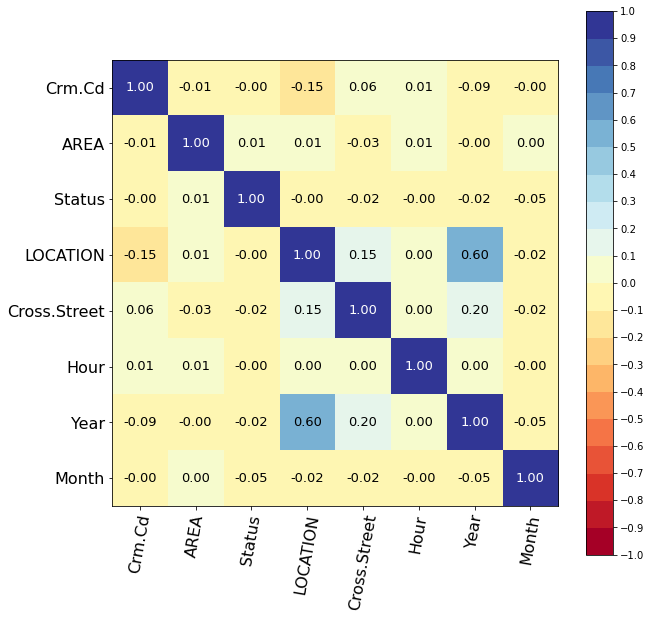

In [396]:
#Zweite Variante
correlation_matrix(data, figure_size=(10,10), text_fontsize=13)

In [398]:
#Correlation mit label-Variable (CrimeTyp)
label = abs(correlation['Crm.Cd'])
#Zeigen die relevanten für die Vorhersage des CrimeTypes Attribute
beschreibend = cor_target[cor_target>0.02]
beschreibend

Crm.Cd          1.000000
LOCATION        0.145183
Cross.Street    0.058110
Year            0.093816
Name: Crm.Cd, dtype: float64

# !!! Not used !!!

In [16]:
# Checking for null values
N_null = sum(X.isnull().sum())
print("The raw_dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(X.duplicated(keep='first'))
#dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The raw_dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = X.shape[0]

The raw_dataset contains 821129 null values
The raw_dataset contains 1000 duplicates


In [24]:
print(crimeData.info())
print(10*'=')
print(crimeData.columns)
print(10*'=')
print(crimeData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136589 entries, 0 to 1136588
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Date.Rptd     1136589 non-null  object
 1   DR.NO         1136589 non-null  int64 
 2   DATE.OCC      1136589 non-null  object
 3   TIME.OCC      1136589 non-null  int64 
 4   AREA          1136589 non-null  int64 
 5   AREA.NAME     1136589 non-null  object
 6   RD            1136589 non-null  int64 
 7   Crm.Cd        1136589 non-null  int64 
 8   CrmCd.Desc    1136431 non-null  object
 9   Status        1136589 non-null  object
 10  Status.Desc   1136589 non-null  object
 11  LOCATION      1136589 non-null  object
 12  Cross.Street  320015 non-null   object
 13  Location.1    1132192 non-null  object
dtypes: int64(5), object(9)
memory usage: 121.4+ MB
None
Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
       'Crm.Cd', 'CrmCd.Desc', 'Status', 'Stat

## Reported Crime 
### ca. 0.5 Fälle waren nicht sofort gemeldet

In [12]:
crimeData["Date.Rptd"] = pd.to_datetime(crimeData["Date.Rptd"],infer_datetime_format=True)
crimeData["DATE.OCC"] = pd.to_datetime(crimeData["DATE.OCC"],infer_datetime_format=True)
crimeReportDelay = crimeData[crimeData["Date.Rptd"] != crimeData["DATE.OCC"]]
print(len(crimeReportDelay) / len(crimeData))
crimeReportDelay.head(10)

0.4979689228032297


,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,year
4,2013-05-26,130510483,2013-05-25,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",2013
5,2013-05-24,131213618,2013-05-22,1145,12,77th Street,1211,997,TRAFFIC DR #,UNK,Unknown,54TH,CRENSHAW,"(33.9931, -118.3308)",2013
8,2014-08-22,140119671,2014-08-23,1945,1,Central,111,210,ROBBERY,IC,Invest Cont,900 N HILL ST,NaN,"(34.0644, -118.2387)",2014
12,2014-08-22,142114498,2014-08-23,2019,21,Topanga,2126,901,VIOLATION OF RESTRAINING ORDER,IC,Invest Cont,21100 SATICOY ST,NaN,"(34.2083, -118.5929)",2014
14,2014-08-20,141115368,2014-08-21,2000,11,Northeast,1171,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),IC,Invest Cont,3800 W SUNSET BL,NaN,"(34.091, -118.2788)",2014
15,2014-08-20,141115372,2014-08-21,2030,11,Northeast,1143,330,BURGLARY FROM VEHICLE,IC,Invest Cont,2800 GRIFFITH PARK BL,NaN,"(34.1075, -118.2732)",2014
19,2014-08-19,140318169,2014-08-22,1430,3,Southwest,319,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,FIGUEROA,12TH,"(34.0419, -118.2669)",2014
20,2014-08-19,140812560,2014-08-21,1500,8,West LA,823,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,15300 ANTIOCH ST,NaN,"(34.047, -118.5259)",2014
21,2014-08-18,141218838,2014-08-21,1830,12,77th Street,1283,624,BATTERY - SIMPLE ASSAULT,IC,Invest Cont,10300 S WESTERN AV,NaN,"(33.9432, -118.309)",2014
23,2014-08-18,141917489,2014-08-19,1800,19,Mission,1959,210,ROBBERY,IC,Invest Cont,SHARP AV,PIERCE ST,"(34.2609, -118.4402)",2014


In [13]:
delays = abs(crimeReportDelay["Date.Rptd"] - crimeReportDelay["DATE.OCC"])
delays.describe()

count                        565986
mean     14 days 02:13:10.823805133
std      57 days 21:11:06.946582548
min                 1 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 5 days 00:00:00
max              1422 days 00:00:00
dtype: object

## Crime Status

<AxesSubplot:ylabel='Status.Desc'>

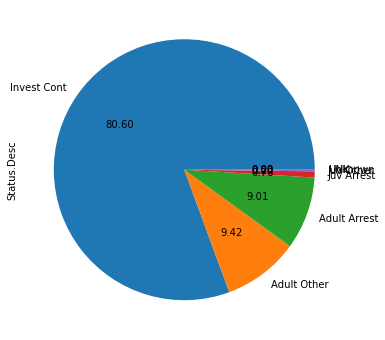

In [15]:
crimeData['Status.Desc'].value_counts().plot(kind = 'pie',autopct='%.2f',figsize=(6,6))

In [ ]:
for status in crimeData['Status.Desc'].value_counts().keys():
    temp = crimeData[crimeData['Status.Desc'] == status]['CrmCd.Desc'].value_counts()
    print("Most common crime with {} is {}".format(status,temp.keys()[0]))

## Graphing Crime Numbers

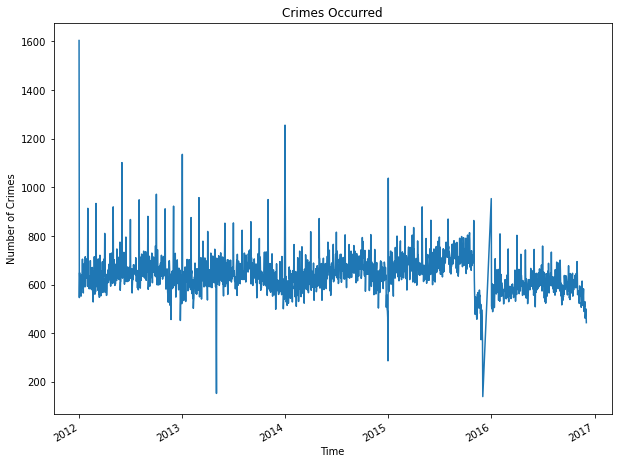

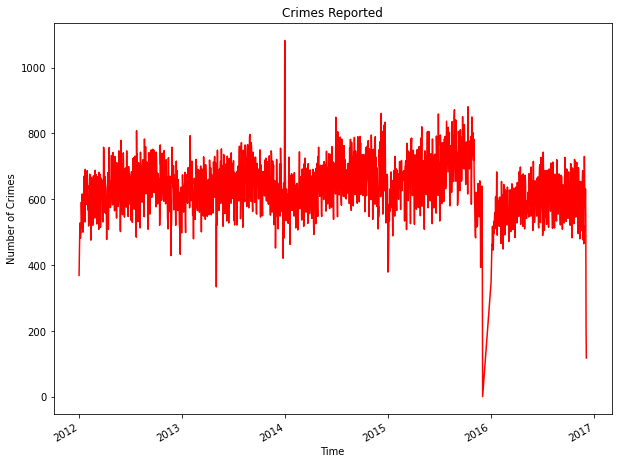

In [14]:
crOcc = crimeData['DATE.OCC']
crOcc.value_counts().sort_index().plot(figsize=(10,8))
plt.title('Crimes Occurred')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()
crRptd = crimeData['Date.Rptd']
crRptd.value_counts().sort_index().plot(color='r',figsize=(10,8))
plt.title('Crimes Reported')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()